In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [54]:
# Load pkl file 
with open('./comparison_data/ABIDE/automatic/hierarchical/2023-12-12 10:18:38.614094_gatv2_adj_binary.pkl', 'rb') as f:
    data_automatic = pkl.load(f)

# Load pkl file
with open('./comparison_data/ABIDE/manual/7/2023-12-12 11:04:37.889317_gatv2_adj_binary.pkl', 'rb') as f:
    data_manual = pkl.load(f)

# Load pkl file
with open('./comparison_data/ABIDE/original/2023-12-12 10:43:36.214590_gatv2_adj_binary.pkl', 'rb') as f:
    data_original = pkl.load(f)

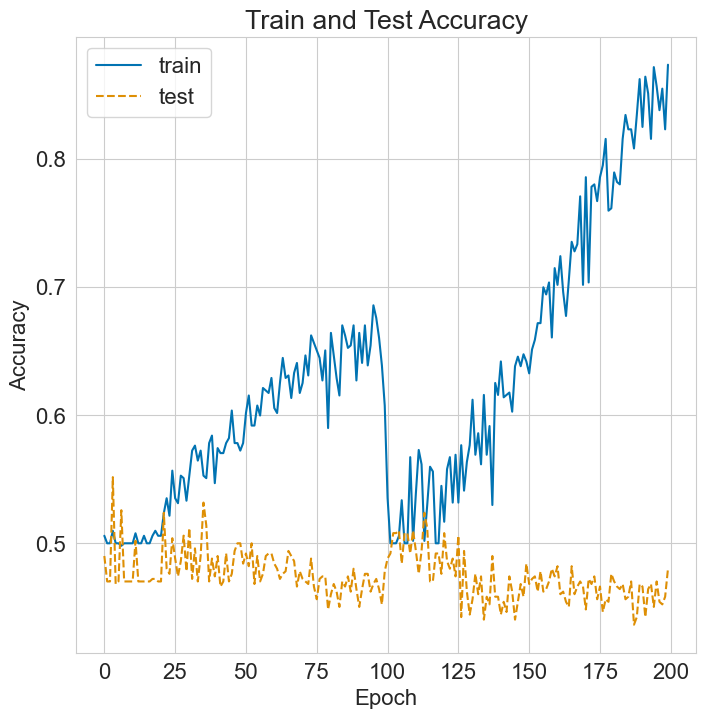

In [55]:
# Plot the train and test accs
# they are saved in a dictionary as np arrays

sns.set_style('whitegrid')
sns.set_palette('colorblind')
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 8))
plt.plot(data_automatic['train_accs'].reshape(-1), label='train')
plt.plot(data_automatic['test_accs'].reshape(-1), label='test', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()

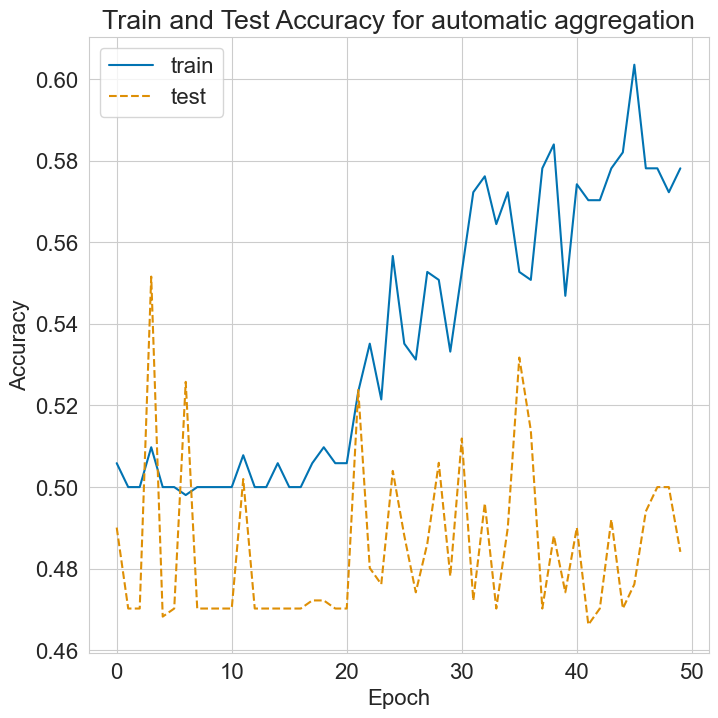

In [56]:
# Zoom in on the first 50 epochs
plt.figure(figsize=(8, 8))
plt.plot(data_automatic['train_accs'].reshape(-1)[:50], label='train')
plt.plot(data_automatic['test_accs'].reshape(-1)[:50], label='test', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for automatic aggregation')
plt.legend()
plt.show()

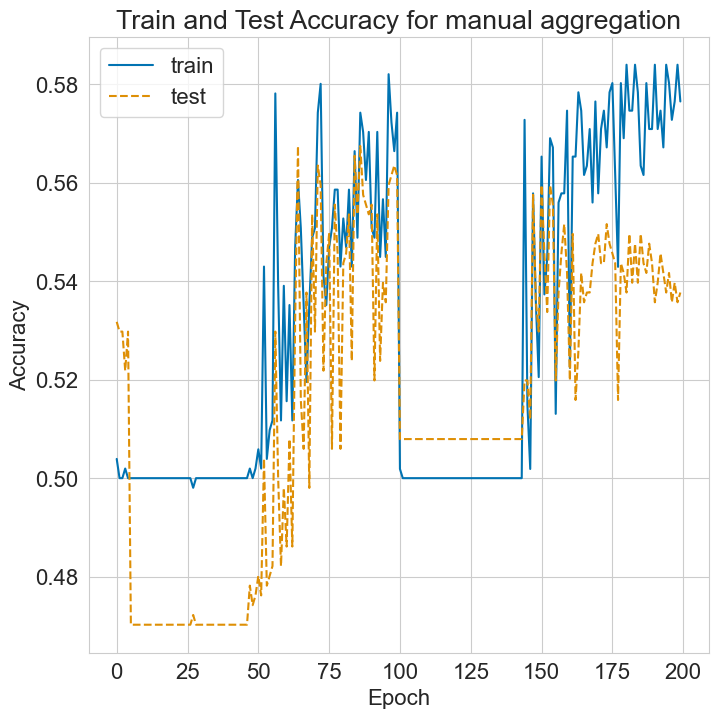

In [57]:
# Plot the train and test accs
# they are saved in a dictionary as np arrays

sns.set_style('whitegrid')
sns.set_palette('colorblind')
plt.figure(figsize=(8, 8))
plt.plot(data_manual['train_accs'].reshape(-1), label='train')
plt.plot(data_manual['test_accs'].reshape(-1), label='test', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for manual aggregation')
plt.legend()

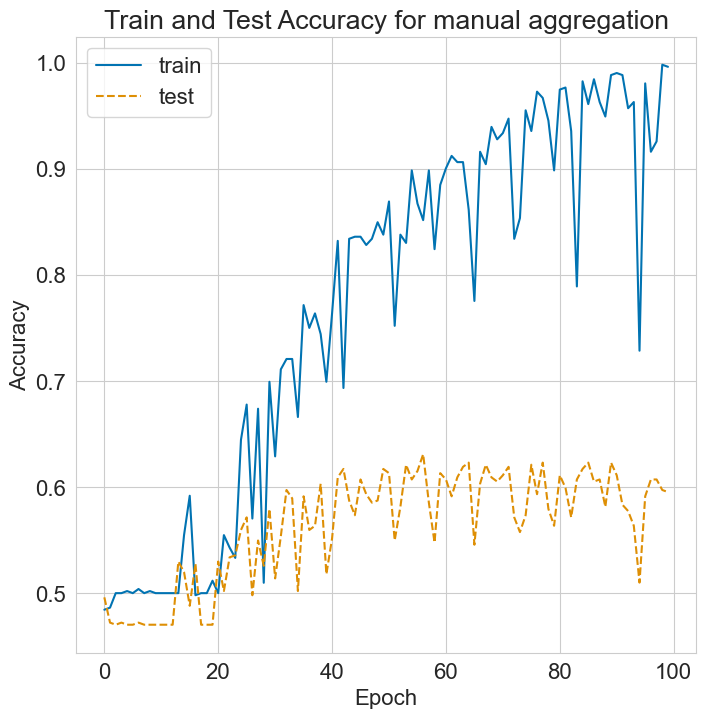

In [58]:
# Plot the train and test accs
# they are saved in a dictionary as np arrays

sns.set_style('whitegrid')
sns.set_palette('colorblind')
plt.figure(figsize=(8, 8))
plt.plot(data_original['train_accs'].reshape(-1), label='train')
plt.plot(data_original['test_accs'].reshape(-1), label='test', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for manual aggregation')
plt.legend()

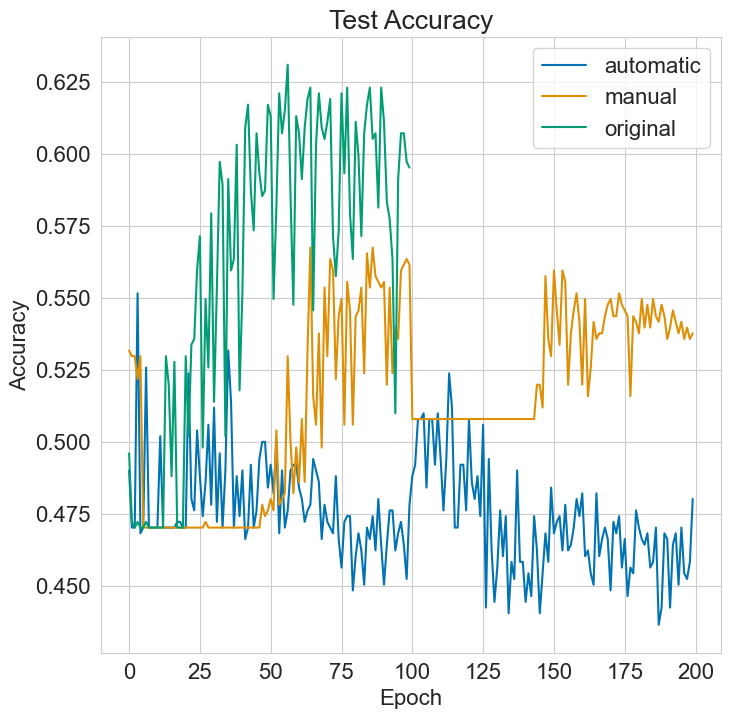

In [59]:
# Plot test accuracy for all models
sns.set_style('whitegrid')
sns.set_palette('colorblind')
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8, 8))
plt.plot(data_automatic['test_accs'].reshape(-1), label='automatic')
plt.plot(data_manual['test_accs'].reshape(-1), label='manual')
plt.plot(data_original['test_accs'].reshape(-1), label='original')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()
plt.show()

In [60]:
# Compare automatic and manual best accuracies
print('Automatic best accuracy: ', np.max(data_automatic['test_accs']))
print('Manual best accuracy: ', np.max(data_manual['test_accs']))
print('Original best accuracy: ', np.max(data_original['test_accs']))

Automatic best accuracy:  0.5515873015873016
Manual best accuracy:  0.5674603174603174
Original best accuracy:  0.6309523809523809


In [61]:
# Compare automatic and manual mean accuracies
print('Automatic accuracy: ', np.mean(data_automatic['test_accs']), "+/-", np.std(data_automatic['test_accs']))
print('Manual accuracy: ', np.mean(data_manual['test_accs']), "+/-", np.std(data_manual['test_accs']))
print('Original accuracy: ', np.mean(data_original['test_accs']), "+/-", np.std(data_original['test_accs']))


Automatic accuracy:  0.4750595238095238 +/- 0.018464654989331142
Manual accuracy:  0.5144345238095238 +/- 0.030476821812140446
Original accuracy:  0.5632539682539681 +/- 0.05159285684374406


In [19]:
# Code for creating a gif of the training progress for presentation

import matplotlib.pyplot as plt
import imageio
import seaborn as sns
import numpy as np
import os


sns.set_style('whitegrid')
sns.set_palette('colorblind')
plt.rcParams.update({'font.size': 16})

filenames = []

for epoch in range(len(data_original['train_accs'][0])):
    plt.figure(figsize=(8, 8))
    plt.plot(data_original['train_accs'][0][:epoch+1], label='train')
    plt.plot(data_original['test_accs'][0][:epoch+1], label='test', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Train and Test Accuracy')
    plt.legend()
    plt.ylim([0.4, 1])  # Adjust as needed

    # Save each plot as a frame
    filename = f'frame_{epoch}.png'
    plt.savefig(filename)
    plt.close()
    filenames.append(filename)

# Create the GIF
with imageio.get_writer('training_progress.gif', mode='I', duration=0.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove files
for filename in filenames:
    os.remove(filename)


/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_79933/3573870470.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [64]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

# Target values for the three bars
target_values = [0.6071, 0.6270, 0.6310]  # Replace with your target values

# Number of steps/frames in the animation
num_frames = 50

# Filenames for the temporary image files
filenames = []

for frame in range(num_frames):
    # Calculate the height of the bars for this frame
    current_heights = [target * frame / num_frames for target in target_values]

    plt.figure(figsize=(6, 4))
    plt.bar(['AAL', 'HO', 'CC200'], current_heights, color=['#007c92', '#610059', '#8c1515'])
    plt.ylim(0,0.7)  # Adjust y-axis limit
    plt.title(f'GAT accuracy for different atlases')

    # Save the plot as a temporary image file
    filename = f'bar_frame_{frame}.png'
    plt.savefig(filename)
    plt.close()
    filenames.append(filename)

# Create the GIF
with imageio.get_writer('bar_animation.gif', mode='I', duration=0.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up the temporary files
for filename in filenames:
    os.remove(filename)


/var/folders/rl/d4jq2g217cv1hy_ssxxj4k0r0000gn/T/ipykernel_79933/435451799.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
